## Машинное обучение, ВМК МГУ

## Практическое задание 2

### Общая информация
Дата выдачи: 7 октября 2020

Максимальная оценка: 10 баллов + 1 бонусный балл

Мягкий дедлайн: 23:59MSK 20 октября

Жесткий дедлайн: 23:59MSK 27 октября.

### О задании

В этом задании вы:
- Познакомитесь с методом решения задачи регрессии на основе метода ближайших соседей.
- Реализуете алгоритм kNN для задачи регрессии.
- Изучите методы работы с категориальными и текстовыми переменными.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Для сдачи задания переименуйте получившийся файл *.ipynb в соответствии со следующим форматом: homework-practice-02-Username.ipynb, где Username — ваша фамилия и имя на латинице именно в таком порядке (например, homework-practice-02-ivanov.ipynb).

Далее отправьте этот файл на anytask в соответсвующий раздел.

In [1]:
import numpy as np
import pandas as pd

Все эксперименты в этой лабораторной работе предлагается проводить на данных соревнования New York City Airbnb Open Data: https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data#AB_NYC_2019.csv

В данной задаче предлагается предсказать цену на съем квартиры в зависимости от её параметров.

In [2]:
data = pd.read_csv('AB_NYC_2019.csv')
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
data.shape

(48895, 16)

In [4]:
# число значений у признаков
for col_name in data.columns:
    print(col_name, len(data[col_name].unique()))

id 48895
name 47906
host_id 37457
host_name 11453
neighbourhood_group 5
neighbourhood 221
latitude 19048
longitude 14718
room_type 3
price 674
minimum_nights 109
number_of_reviews 394
last_review 1765
reviews_per_month 938
calculated_host_listings_count 47
availability_365 366


In [5]:
data.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Проверим имеет ли смысл заполнять nan в last_review нулями

In [6]:
data[data["last_review"] != data["last_review"]]["number_of_reviews"].mean()

0.0

Выходит, что да,ведь у всех пропусков количество review равно нулю

Как видите, в данных есть пропуски. Не забудьте обработать их

In [7]:
data.fillna({"name": "missing", "host_name": "unknown",
             "last_review": "no", "reviews_per_month": 0}, inplace=True)
data.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,no,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [8]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Разобъем данные на обучение и контроль.

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['price']), data[['price']],
                                                    test_size=0.3, random_state=241)

## Часть 1: Алгоритм kNN в задаче регрессии

<b> 1.1 (1.5 балла) </b>
Реализуйте класс `KNNRegressor`, который используя метод k ближайших соседей решает задачу регрессии. Для решение данной задачи, необходимо найти $N_k$ - k соседей, и после использовать значения их целевых переменных для предсказания:
\begin{align}
y = \frac{1}{k}\sum_{n \in N_k}w_n y_n,
\end{align}

где $w_n$ - вес каждого соседа. 

При этом `KNNRegressor` может работать в 2 режимах:
 - $uniform$ - ближайшие соседи учитываются с одинаковыми весами.
 - $distance$ - вес ближайших соседей зависит от расстояния
 
**Сигнатуру методов, классов, функции при желании можно менять.**

In [10]:
from typing import Union, Callable, Iterable, Optional
from sklearn.neighbors import NearestNeighbors


class KNNRegressor:

    def __init__(self, n_neighbors: int, metric: Union[str, Callable] = "euclidean",
                 mode: str = 'uniform', correct: float = 10e-5, **kwargs):
        """
        params:
            n_neighbors: number of neighbors
            metric: metric to use for distance computation
            mode: 'uniform' or 'distance'
            'uniform' - all points in each neighborhood are weighted equally
            'distance' - weight points by the inverse of their distance
            'correct' - additive value if distance will be zero
        """
        self.__nn = NearestNeighbors(n_neighbors=n_neighbors, metric=metric, algorithm="brute", **kwargs)
        self.__mode = mode
        self.__n_neighbors = n_neighbors
        self.__correct = correct

    def fit(self, X: np.array, y: np.array) -> None:
        """
            X: data
            y: labels
        """
        self.__y = y
        self.__nn.fit(X)

    def predict(self, X: np.array, n_neighbors: Optional[int] = None) -> np.array:
        """
            X: data
            n_neighbors: number of neighbors
        """
        if n_neighbors is None:
            n_neighbors = self.__n_neighbors
        matrix_pairwise, matrix_indexs = self.__nn.kneighbors(
            X, n_neighbors=n_neighbors, return_distance=True)
        y_values = np.apply_along_axis(lambda x: self.__y[x], arr=matrix_indexs, axis=1)

        if self.__mode == "distance":
            return np.average(y_values, weights=1/(y_values+self.__correct), axis=1)
        return y_values.mean(axis=1)

## Часть 2: Категориальные признаки

<b>2.1 (1 балл)</b>
Реализуйте три функции расстояния на категориальных признаках _(в этом задании только на них!)_ , которые обсуждались на [втором семинаре](https://github.com/mmp-mmro-team/mmp_mmro_fall_2020/blob/master/seminars/sem02_knn.pdf). Не забудьте, что KNNRegressor должен уметь работать с этими функциями расстояния. Как вариант, можно реализовать метрики как [user-defined distance](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html).

In [11]:
def freq_categorical(X: np.array, uniq: Optional[list] = None, count: Optional[list] = None,
                     return_count: bool = True) -> list:
    tmp_list = []
    for i in range(X.shape[1]):
        if(uniq is not None and count is not None):
            u, c = uniq[i], count[i]
        else:
            u, c = np.unique(X[:, i], return_counts=True)
        if(not return_count):
            c = c/c.sum()
        tmp_list.append(dict(zip(u, c)))
    return tmp_list


def proba_coincidence(X: np.array) -> list:
    tmp_list = []
    for i in range(X.shape[1]):
        y, count = np.unique(X[:, i], return_counts=True)
        arg_sort = np.argsort(count)
        y = y[arg_sort]
        count = count*(count - 1)/(X.shape[0]*(X.shape[0]-1))
        count = np.cumsum(count)
        tmp_list.append(dict(zip(y, count)))
    return tmp_list


def freq_encoder(X: np.array, freq: Union[list, str] = "freq_categorical") -> np.array:
    if isinstance(freq, str):
        if freq == "freq_categorical":
            freq = freq_categorical(X)
        elif freq == "proba_coincidence":
            freq = proba_coincidence(X)
        else:
            raise ValueError

    ans = np.empty_like(X, dtype=float)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            ans[i, j] = freq[j].get(X[i, j], 0)
    return ans

In [12]:
import sklearn.neighbors
import sklearn.metrics

vbrute = sklearn.neighbors.VALID_METRICS['brute']
vmetrics = sklearn.metrics.pairwise._VALID_METRICS
pairwise = sklearn.metrics.pairwise.PAIRWISE_DISTANCE_FUNCTIONS


def install_metric(f):
    name = f.__name__
    if name not in vbrute:
        vbrute.append(name)
    if name not in vmetrics:
        vmetrics.append(name)

    pairwise[name] = f
    return f

In [13]:
@install_metric
def overlap_hack(X: np.array, Z: np.array, w: Union[str, np.array] = "uniform") -> float:
    if type(w) != str:
        w = w
    else:
        w = np.full_like(X[0], 1, dtype=float)
    return ((X[:, None, :] != Z[None, :, :])*w[None, None, :]).sum(axis=-1)


@install_metric
def flattened_overlap_hack(X: np.array, Z: np.array, prob: Optional[np.array] = None,
                           w: Union[str, np.array] = "uniform") -> float:
    if prob is None:
        prob = freq_encoder(Z, "proba_coincidence")

    if type(w) != str:
        w = w
    else:
        w = np.full_like(X[0], 1, dtype=float)

    distances = (X[:, None, :] != Z[None, :, :])+(X[:, None, :] == Z[None, :, :])*prob[None, :, :]
    return (distances*w[None, None, :]).sum(axis=-1)


@install_metric
def log_overlap_hack(X: np.array, Z: np.array, Z_freq: Optional[np.array] = None,
                     w: Union[str, np.array] = "uniform") -> float:
    if Z_freq is None:
        Z_freq = freq_encoder(Z)

    if type(w) != str:
        w = w
    else:
        w = np.full_like(X[0], 1, dtype=float)

    # Из-за chunks пришлось делать такой костыль
    X_freq = freq_encoder(X)

    distances = (X[:, None, :] != Z[None, :, :])*np.log(1+X_freq[:, None, :])*np.log(1+Z_freq[None, :, :])
    return (distances*w[None, None, :]).sum(axis=-1)

<b>2.2 (1 балл)</b> Найдите все категориальные признаки в данных. Подсчитайте для каждой из метрик качество на тестовой выборке `X_test` при числе соседей $k = 10$. Качество измеряйте с помощью RMSE.

Какая функция расстояния оказалась лучшей? Почему?

In [14]:
info = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48895 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48895 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

**Категориальных признаков:4** (На самом деле можно по-разному выбрать категориальные данные, но я остановлюсь на таком  ↓)

In [15]:
from sklearn.preprocessing import OrdinalEncoder
cat = ["host_name", "neighbourhood_group", "neighbourhood", "room_type"]
encoder = OrdinalEncoder().fit(data[cat].to_numpy())
X_train_cat = encoder.transform(X_train[cat].to_numpy())
X_test_cat = encoder.transform(X_test[cat].to_numpy())

y_train_price = y_train.to_numpy()
y_test_price = y_test.to_numpy()

In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

**Меняю дефолтные настройки, чтобы при вычислении расстояния компьютер не умер от трехмерного тензора**

In [17]:
sklearn.set_config(working_memory=200)
sklearn.get_config()

{'assume_finite': False,
 'working_memory': 200,
 'print_changed_only': True,
 'display': 'text'}

In [18]:
freq_train = freq_encoder(X_train_cat)
prob = freq_encoder(X_train_cat, "proba_coincidence")

In [19]:
model = KNNRegressor(10, metric="flattened_overlap_hack", metric_params={"prob": prob})
model.fit(X_train_cat, y_train_price)
mean_squared_error(model.predict(X_test_cat), y_test_price, squared=False)

209.02866887099538

In [20]:
model = KNNRegressor(10, metric="overlap_hack")
model.fit(X_train_cat, y_train_price)
mean_squared_error(model.predict(X_test_cat), y_test_price, squared=False)

215.36188612194348

**Упс.. проблема (log_overlap)**

Так как Sklearn делит X_test на батчи при вычислении расстояния, log(1+fi) нормальным способом нельзя посчитать для всего X_test.
Приходится считать для текущего батча. Это можно починить костыльным костылем в виде глобальной переменной - счетчика количества запусков,  но мое внутреннее чувство прекрасного кричит не делать этого.

Наверное, это несильно страшно, просто мой компьютер не тянет этот тензор без батчей посчитать.

Я думаю, что чем больше батч, тем больше будет похоже на идеально правильный вариант реализации.

In [21]:
model = KNNRegressor(10, metric="log_overlap_hack", metric_params={"Z_freq": freq_train})
model.fit(X_train_cat, y_train_price)
mean_squared_error(model.predict(X_test_cat), y_test_price, squared=False)

218.75029304889654

**Если честно, то мне сложно сказать, что какая-то из функций оказалась лучше, чем другая. Все они показывают довольно плохое качество, но можно выделить flattened_overlap - она более "умно" действует на мой взгляд, если xi=zi.**

<b>2.3 (1 балл) бонус</b> Подберите лучшее (на тестовой выборке) число соседей $k$ для каждой из функций расстояния. Какого удалось достичь уровня качества?

In [23]:
models = {
    "flattened_overlap": KNNRegressor(10, metric="flattened_overlap_hack", metric_params={"prob": prob}),
    "overlap": KNNRegressor(10, metric="overlap_hack"),
    "log_overlab": KNNRegressor(10, metric="log_overlap_hack", metric_params={"Z_freq": freq_train})
}
scores = {"flattened_overlap": [], "overlap": [], "log_overlab": []}
for m in models:
    models[m].fit(X_train_cat, y_train_price)

for i in range(1, 16):
    print(f"neighbors: {i}")
    for m in models:
        rmse = mean_squared_error(models[m].predict(X_test_cat, n_neighbors=i), y_test_price, squared=False)
        scores[m].append(round(rmse, 2))
        print(f"{m} RMSE: {round(rmse,2)}")

neighbors: 1
flattened_overlap RMSE: 267.24
overlap RMSE: 267.06
log_overlab RMSE: 255.65
neighbors: 2
flattened_overlap RMSE: 228.12
overlap RMSE: 229.86
log_overlab RMSE: 231.64
neighbors: 3
flattened_overlap RMSE: 216.51
overlap RMSE: 217.29
log_overlab RMSE: 217.9
neighbors: 4
flattened_overlap RMSE: 220.74
overlap RMSE: 235.41
log_overlab RMSE: 229.2
neighbors: 5
flattened_overlap RMSE: 216.74
overlap RMSE: 227.96
log_overlab RMSE: 224.64
neighbors: 6
flattened_overlap RMSE: 214.45
overlap RMSE: 227.35
log_overlab RMSE: 222.5
neighbors: 7
flattened_overlap RMSE: 213.17
overlap RMSE: 222.3
log_overlab RMSE: 221.81
neighbors: 8
flattened_overlap RMSE: 211.12
overlap RMSE: 218.45
log_overlab RMSE: 221.5
neighbors: 9
flattened_overlap RMSE: 210.34
overlap RMSE: 216.78
log_overlab RMSE: 220.03
neighbors: 10
flattened_overlap RMSE: 209.03
overlap RMSE: 215.36
log_overlab RMSE: 218.75
neighbors: 11
flattened_overlap RMSE: 209.21
overlap RMSE: 214.32
log_overlab RMSE: 217.46
neighbors: 12

In [24]:
for s in scores:
    tmp = np.array(scores[s])
    print(f"{s}, optimal k: {1+tmp.argmin()} rmse {scores[s][tmp.argmin()]}")

flattened_overlap, optimal k: 15 rmse 207.96
overlap, optimal k: 15 rmse 210.94
log_overlab, optimal k: 15 rmse 213.97


**Посмотрим на качество лучшей модели**


In [22]:
model = KNNRegressor(15, metric="flattened_overlap_hack", metric_params={"prob": prob})
model.fit(X_train_cat, y_train_price)
pred = model.predict(X_test_cat)

In [23]:
rmse = mean_squared_error(pred, y_test_price, squared=False)
mae = mean_absolute_error(pred, y_test_price)
print(f"mean of y_test:{y_test_price.mean():.2f}\nrmse:{rmse:.2f}\nmae:{mae:.2f}")

mean of y_test:150.33
rmse:207.96
mae:70.95


**Сравним с baseline(константная модель)**

In [24]:
print(f"rmse:{y_test_price.std():.2f}\nmae:{np.abs(y_test_price-y_test_price.mean()).mean():.2f}")

rmse:220.05
mae:89.54


**Выводы**

Модель обученная на категориальных признаках не намного лучше, чем константный алгоритм. Это может говорить о том, что в категориальных данных не хватает информации для более качественного предсказания, либо выбросы слишком сильно влияют на качество

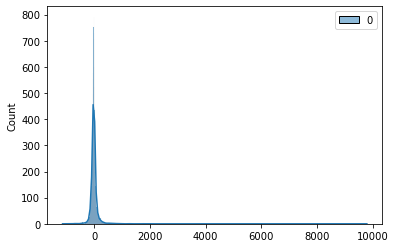

In [25]:
import seaborn as sn
import matplotlib.pyplot as plt
sn.histplot(y_test_price - pred, kde=True)
plt.show()

График чисто для понимания. 
Существуют просто невероятные выбросы и, видимо, из-за них возникает такая большая ошибка

<b>2.4 (2.5 балла)</b> Отойдем ненадолго от задачи регрессии и перейдём к задаче классификации: будем определять, являеться ли квартира дорогой $(target = 1)$ или дешевой $(target = 0)$. Будем считать дорогими квариры, цена которых выше среднего.

In [26]:
data['target'] = (data.price > data.price.mean()).astype(int)
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['target']), data[['target']],
                                                    test_size=0.3, random_state=241)

In [27]:
from sklearn.preprocessing import OrdinalEncoder

cat = ["host_name", "neighbourhood_group", "neighbourhood", "room_type"]
encoder = OrdinalEncoder().fit(data[cat].to_numpy())
X_train_cat = encoder.transform(X_train[cat].to_numpy())
X_test_cat = encoder.transform(X_test[cat].to_numpy())

y_train_tar = y_train.to_numpy()
y_test_tar = y_test.to_numpy()

Реализуйте счетчики, которые заменят категориальные признаки на вещественные.

А именно, для каждого категориального признака $f_j(x)$ необходимо сделать следующее:
1. Число `counts` объектов в обучающей выборке с таким же значением признака.
\begin{align}
counts_j(c) = \sum_{i=1}^l [f_j(x_i) = c]
\end{align}
2. Число `successes` объектов первого класса ($y = 1$) в обучающей выборке с таким же значением признака.
\begin{align}
successes_j(c) = \sum_{i=1}^l[f_j(x_i) = c][y_i = +1].
\end{align}
3. Сглаженное отношение двух предыдущих величин:
\begin{align}
p_j(c) = \frac{successes_j(c) + a}{counts_j(c) + b},
\end{align}

где $a$ и $b$ - априорные счетчики (например, a = 1, b = 2).

In [28]:
def val_count(a, uniq, count):
    tmp = np.where(uniq == a)[0]
    if(tmp.size == 0):
        return 0
    return count[tmp]


vec_val_count = np.vectorize(val_count, excluded=[1, 2])

In [29]:
def counters(X, indexs=None, return_u_c=False):
    if(indexs is None):
        indexs = np.full(X.shape[0], True)
    uniq = []
    count = []
    ans = np.empty_like(X, dtype=float)

    for i in range(X.shape[1]):
        u, c = np.unique(X[indexs.ravel(), i], return_counts=True)
        ans[:, i] = vec_val_count(X[:, i], u, c)
        uniq.append(u)
        count.append(c)
    if(return_u_c):
        return ans, uniq, count
    return ans

Поскольку признаки, содержащие информацию о целевой переменной, могут привести к переобучению, может оказаться полезным сделать *фолдинг*: разбить обучающую выборку на $n$ частей, и для $i$-й части считать `counts` и `successes` по всем остальным частям. Для тестовой выборки используются счетчики, посчитанный по всей обучающей выборке. Реализуйте и такой вариант. Достаточно взять $n = 3$.

In [30]:
from sklearn.model_selection import KFold


def fold_counters(X, n=3, indexs=None):
    ans = np.empty_like(X, dtype=float)
    kf = KFold(n).split(X[:, 0])
    mask = None
    for other, arr in kf:
        if indexs is not None:
            if indexs.dtype == int:
                mask = indexs[indexs < other.size]
            elif indexs.dtype == bool:
                mask = indexs[other].ravel()

        for i in range(X.shape[1]):
            u, c = np.unique(X[other[mask], i], return_counts=True)
            ans[arr, i] = vec_val_count(X[arr, i], u, c)

    return ans

In [31]:
a = 1
b = 2

tmp_fold = []
tmp_fold.append(fold_counters(X_train_cat))
tmp_fold.append(fold_counters(X_train_cat, indexs=(y_train_tar == 1)))
tmp_fold.append((tmp_fold[1]+a)/(tmp_fold[1]+b))
X_train_fold = np.hstack(tmp_fold)

tmp_unfold = []
tmp_unfold.append(counters(X_train_cat))
tmp_unfold.append(counters(X_train_cat, indexs=(y_train_tar == 1)))
tmp_unfold.append((tmp_unfold[1]+a)/(tmp_unfold[1]+b))
X_train_unfold = np.hstack(tmp_unfold)

In [32]:
_, uniq, count = counters(X_train_cat, return_u_c=True)
tmp_1 = freq_encoder(X_test_cat, freq_categorical(X_test_cat, uniq, count))

_, uniq, count = counters(X_train_cat, return_u_c=True, indexs=(y_train_tar == 1))
tmp_2 = freq_encoder(X_test_cat, freq_categorical(X_test_cat, uniq, count))
X_test_count = np.hstack((tmp_1, tmp_2, (tmp_2+a)/(tmp_1+b)))

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [34]:
acc_fold = []
for i in range(7, 40):
    model_fold = KNeighborsClassifier(i, weights="distance")
    model_fold.fit(X_train_fold, y_train_tar.ravel())
    pred_fold = model_fold.predict(X_test_count)
    acc_fold.append((accuracy_score(pred_fold, y_test_tar), i))
best_fold = max(acc_fold)
print(best_fold)

model_fold = KNeighborsClassifier(best_fold[1], weights="distance")
model_fold.fit(X_train_fold, y_train_tar.ravel())
pred_fold = model_fold.predict(X_test_count)

(0.7841707001158906, 28)


In [35]:
acc_unfold = []
for i in range(7, 40):
    model_unfold = KNeighborsClassifier(i, weights="distance")
    model_unfold.fit(X_train_unfold, y_train_tar.ravel())
    pred_unfold = model_unfold.predict(X_test_count)
    acc_unfold.append((accuracy_score(pred_unfold, y_test_tar), i))
best_unfold = max(acc_unfold)
print(best_unfold)

model_unfold = KNeighborsClassifier(best_unfold[1], weights="distance")
model_unfold.fit(X_train_unfold, y_train_tar.ravel())
pred_unfold = model_unfold.predict(X_test_count)

(0.7990319721862431, 39)


Посчитайте на тесте AUC-ROC метода $k$ ближайших соседей с евклидовой метрикой для выборки, где категориальные признаки заменены на счетчики. Сравните по AUC-ROC два варианта формирования выборки — с фолдингом и без. Не забудьте подобрать наилучшее число соседей $k$.

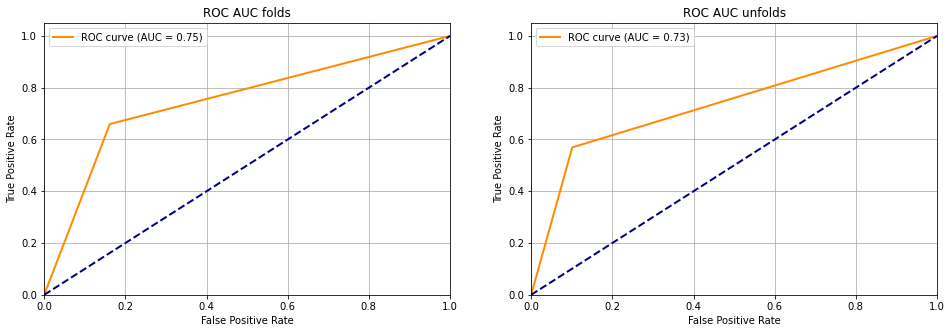

In [36]:
# https://gist.github.com/Keiku/b6dca88b9bbe7b55701e43f7f5ee19a6
from sklearn.metrics import roc_curve, auc

fpr = []
tpr = []
roc_auc = []
for pred in (pred_fold, pred_unfold):
    fpr_tmp, tpr_tmp, _ = roc_curve(y_test_tar, pred)
    fpr.append(fpr_tmp)
    tpr.append(tpr_tmp)
    roc_auc.append(auc(fpr_tmp, tpr_tmp))

lw = 2
fig, ax = plt.subplots(1, 2, figsize=(16, 5))
for s, i in zip(["folds", "unfolds"], range(2)):
    ax[i].plot(fpr[i], tpr[i], color='darkorange',
               lw=lw, label='ROC curve (AUC = %0.2f)' % roc_auc[i])
    ax[i].plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    ax[i].set_xlim([0.0, 1.0])
    ax[i].set_ylim([0.0, 1.05])
    ax[i].set_xlabel('False Positive Rate')
    ax[i].set_ylabel('True Positive Rate')
    ax[i].set_title('ROC AUC '+s)
    ax[i].grid(True)
    ax[i].legend()

В данном случае фолдинг действительно помогает - хоть и показатель качества лучше, мы видим, что AUC хуже, чем у кодирования с фолдами.

<b>2.5 (1 балл)</b> Вернемся к задаче регрессии. Утверждается, что для задачи регрессии можно также сделать преобразование категориальных признаков в действительные числа. Для этого достаточно для каждого значения признака $f_j$ вычислить:
\begin{align}
p_j(c) = g(T_i | f_j(x_i) = c),
\end{align}

где $T_i$ - значения целевой переменной объекта $x_i$. Функция $g$ - среднее (mean) или среднеквадратичное отклонение (std).

Закодируйте категориальные признаки обоими способами и найдите значение RMSE. Используйте евклидову метрику для поиска ближайших соседей. Для какой функции $g$ значение RMSE лучше? Почему?

In [37]:
def statistic_encoder(func, X_train, y_train, X_test=None):
    train = np.zeros_like(X_train)
    if(X_test is not None):
        test = np.zeros_like(X_test)

    for i in range(X_train.shape[1]):
        uniq = np.unique(X_train[:, i])
        for u in uniq:
            mask = (X_train[:, i] == u)
            stat = func(y_train[mask])

            train[mask, i] = stat
            if(X_test is not None):
                uniq_test = np.unique(X_test[:, i])
                if(u in uniq_test):
                    mask_test = (X_test[:, i] == u)
                    test[mask_test, i] = stat

    if(X_test is not None):
        return train, test
    return train

In [38]:
X_train_mean, X_test_mean = statistic_encoder(np.mean, X_train_cat, y_train_price, X_test_cat)
X_train_std, X_test_std = statistic_encoder(np.std, X_train_cat, y_train_price, X_test_cat)

In [39]:
model_mean = KNNRegressor(15)
model_mean.fit(X_train_mean, y_train_price)
pred_mean = model_mean.predict(X_test_mean)
mean_squared_error(pred_mean, y_test_price, squared=False)

219.05500076533

In [40]:
model_std = KNNRegressor(15)
model_std.fit(X_train_std, y_train_price)
pred_std = model_std.predict(X_test_std)
mean_squared_error(pred_std, y_test_price, squared=False)

214.17964438545488

Опять же большой вопроc можно ли однозначно говорить, что лучше, когда настолько большой показатель rmse(если учесть, что y_test.mean()=150.33), но можно предположить, что стандартное отклонение в данном случае лучше, потому что среднее значения при условии категори были примерно одинаковыми, а следовательно менее информативными.

## Часть 3: Текстовые признаки

<b>3.1 (2 балла)</b> Перейдем от категориальным признаков к текстовым. Рассмотрим 2 способа преобразования текста в действительные числа:
- Мешок слов (Bag of Words)
- TF-IDF

[Здесь](https://scikit-learn.org/stable/modules/feature_extraction.html) вы можете прочитать про их применение в Питоне.

Сравните оба способа на задаче регресси. Какую лучше метрику использовать: евклидову или косинусную меру? Постройте графики зависимости качества решения задачи от способа преобразования, метрики и количества соседей. Мера качества - RMSE.

Объясните полученные результаты.

Перед преобразованием не забудьте уменьшить размер словаря. Например, это можно сделать за счет приведения всех слов к одному регистру и удаления [стопслов](https://en.wikipedia.org/wiki/Stop_words) (артиклей, предлогов, союзов). Можно использовать использовать, например, библиотеку nltk.

In [41]:
from nltk.stem import PorterStemmer
import nltk
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /home/tyskiy/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/tyskiy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [42]:
def stemmer(X):
    tmp = []

    lemmatizer = PorterStemmer()
    for sentence in X:
        word_list = nltk.word_tokenize(sentence)

        lemmatized_s = ' '.join([lemmatizer.stem(w) for w in word_list])
        tmp.append(lemmatized_s)
    return tmp

In [43]:
text_features = ["name"]
X_train_text = list(arr[0] for arr in X_train[text_features].to_numpy())
X_test_text = list(arr[0] for arr in X_test[text_features].to_numpy())
X_train_text = stemmer(X_train_text)
X_test_text = stemmer(X_test_text)

In [44]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
count_vectorizer = CountVectorizer(lowercase=True, stop_words="english", min_df=5)
tfidf_vectorizer = TfidfVectorizer(lowercase=True, stop_words="english", min_df=5)

bag_train = count_vectorizer.fit_transform(X_train_text)
bag_test = count_vectorizer.transform(X_test_text)

tf_train = tfidf_vectorizer.fit_transform(X_train_text)
tf_test = tfidf_vectorizer.transform(X_test_text)


feature_names = count_vectorizer.get_feature_names()
print(bag_train.shape, tf_train.shape)
pd.DataFrame(data=tf_train.toarray(), columns=feature_names)

(34226, 1404) (34226, 1404)


,000,10,100,1000,107,10min,10th,11,116,11th,...,yoga,york,yorker,young,zen,zone,zoo,旅途中的家,紐約民宿,纽约之家
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34221,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34223,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34224,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


metric:euclidean, transform:bag of words
metric:cosine, transform:bag of words
metric:euclidean, transform:tf-idf
metric:cosine, transform:tf-idf


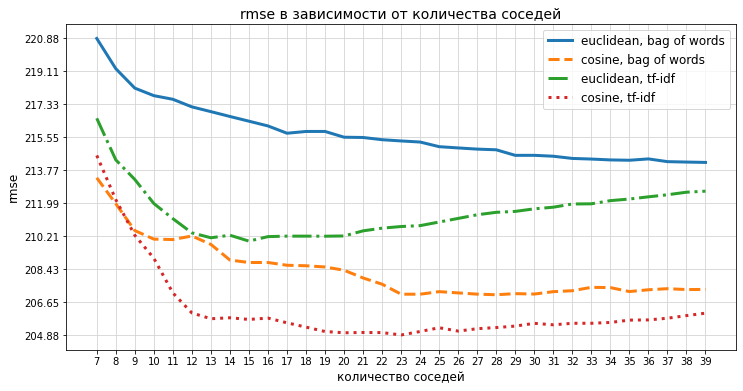

In [52]:
from itertools import product

metric = ["euclidean", "cosine"]
transform = {"bag of words": (bag_train, bag_test), "tf-idf": (tf_train, tf_test)}
k_neighbors = list(range(7, 40))
ls = ["-", "--", "-.", ":"]
min_rmse = float("inf")
max_rmse = float("-inf")

fig = plt.figure(figsize=(12, 6))
for l, tmp in zip(ls, product(transform, metric)):
    t, m = tmp
    rmse = []
    for k in k_neighbors:
        model = KNNRegressor(k, metric=m)
        model.fit(transform[t][0], y_train_price)
        pred = model.predict(transform[t][1])
        rmse.append(mean_squared_error(pred, y_test_price, squared=False))
    if(max_rmse < max(rmse)):
        max_rmse = max(rmse)
    if(min_rmse > min(rmse)):
        min_rmse = min(rmse)

    plt.plot(k_neighbors, rmse, label=f"{m}, {t}", ls=l, lw=3)
    print(f"metric:{m}, transform:{t}")

plt.yticks(np.linspace(min_rmse, max_rmse, 10))
plt.xticks(k_neighbors)
plt.xlabel("количество соседей", size=12)
plt.ylabel("rmse", size=12)
plt.title("rmse в зависимости от количества соседей", size=14)
plt.grid(True, color="lightgrey")
plt.legend(fontsize=12)
plt.show()

Как и ожидалось трансформация с помощью tf-idf дает лучшее качество, причем и для евклидова, и для косинусного расстояния.Ведь tf-idf в некотором смысле апгрейднутый счетчик количества слов в документе. Также получилось, что косинусное расстояние во всех случаях лучше евклидова. Кажется в NLP чаще всего используется cosine. Думаю это связано с тем, что важна относительная встречаемость слов, а не абсолютная.

Пример: (1,1,1,0,0) и (100,100,100,0,0) скорее всего должны быть очень похожими документами, ведь в них одинаковые слова и частота слов одинаковая. Косинусная мера "умеет" это понимать.

<b>3.2 (1 балл)</b> Используя все доступные признаки, решите задачу регрессии. Для категориальных и текстовых признаков выберите лучшие преобразования (из сделанных раннее заданий). Повлияло ли добавление количественного признака на метрику качества?

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [46]:
numeric_features = ["latitude", "longitude", "minimum_nights", "number_of_reviews",
                    "reviews_per_month", "calculated_host_listings_count", "availability_365"]
X_train_num = X_train[numeric_features].to_numpy()
X_test_num = X_test[numeric_features].to_numpy()


X_train_all = np.hstack((X_train_num, X_train_std, tf_train.toarray()))
X_test_all = np.hstack((X_test_num, X_test_std, tf_test.toarray()))
X_train_all.shape, X_train_num.shape, X_train_std.shape, tf_train.shape

((34226, 1415), (34226, 7), (34226, 4), (34226, 1404))

In [47]:
# модель, работающая только с числовыми данными
model_num = KNNRegressor(30)
model_num.fit(X_train_num, y_train_price)
pred = model_num.predict(X_test_num)

In [48]:
mean_squared_error(pred, y_test_price, squared=False), mean_absolute_error(pred, y_test_price)

(219.43036622786127, 89.43546254005045)

In [49]:
# модель, работающая только с текстовыми данными
model_text = KNNRegressor(23, metric="cosine")
model_text.fit(tf_train, y_train_price)
pred = model_text.predict(tf_test)

In [50]:
mean_squared_error(pred, y_test_price, squared=False), mean_absolute_error(pred, y_test_price)

(204.8752771253664, 73.69019256817838)

In [51]:
# добавим веса т.к. latitude и longitude, как мне кажется, очень важные признаки
# на практике так и оказалось
w = np.array(([100, 100, 1, 1, 1, 1, 1]+[1, 1, 1, 1]+[1]*1404))
model_all = KNNRegressor(40)
model_all.fit(X_train_all*w, y_train_price)
pred = model_all.predict(X_test_all*w)

In [52]:
mean_squared_error(pred, y_test_price, squared=False), mean_absolute_error(pred, y_test_price)

(206.78645762070772, 68.1609959779126)

Хоть KNN со всеми признаками не смог обойти KNN на текстовых признаках (k=23,metric="cosine") по rmse, но зато mae лучше именно у него. 

Добавление категориальных и текстовых признаков к числовым существенно увеличивает качество и на rmse, и на mae

## Часть 4: Выводы


Категориальные и текстовые данные очень часто несут в себе важную информацию и их надо учитывать. Жаль, что, не всегда это можно сделать "из коробки".

Касательно данного датасета можно было бы разгуляться и добавить новых категориальных признаков(например из availability_365) сделать категории "часто","всегда","нечасто" и т.д.)

Сложность этого датасета в том, что часто появляются выбросы в виде очень дорогих отелей и в большей степени из-за них такая большая ошибка 

In [53]:
mask = y_test_price <= np.quantile(y_test_price, 0.95)
mean_squared_error(pred[mask],y_test_price[mask], squared=False), mean_absolute_error(pred[mask],y_test_price[mask])

(77.77745898529498, 48.962160515944106)

Как видим, если отсечь уж очень большие значения у целевой переменной, то мы получаем уже приемлимый результат